<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Data Visualization Lab**


Estimated time needed: **45 to 60** minutes


In this assignment you will be focusing on the visualization of data.

The data set will be presented to you in the form of a RDBMS.

You will have to use SQL queries to extract the data.


## Objectives


In this lab you will perform the following:


*   Visualize the distribution of data.

*   Visualize the relationship between two features.

*   Visualize composition of data.

*   Visualize comparison of data.


<hr>


## Demo: How to work with database


Download database file.


In [2]:
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite

--2022-08-24 00:09:00--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m4_survey_data.sqlite
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 198.23.119.245
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|198.23.119.245|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 36679680 (35M) [application/octet-stream]
Saving to: ‘m4_survey_data.sqlite’

m4_survey_data.sqli 100%[===================>]  34.98M  33.0MB/s    in 1.1s    

2022-08-24 00:09:01 (33.0 MB/s) - ‘m4_survey_data.sqlite’ saved [36679680/36679680]



Connect to the database.


In [21]:
import sqlite3
conn = sqlite3.connect("m4_survey_data.sqlite") # open a database connection


Import pandas module.


In [22]:
import pandas as pd

In [23]:
Python_count= '''
select Respondent, LanguageDesireNextYear, count(*) count
from LanguageDesireNextYear 
group by Respondent
having count = 1 and LanguageDesireNextYear="Python"
'''
df = pd.read_sql_query(Python_count, conn)
print(df.head())
print("\n{} respondents are only work with python". format(df.shape[0]))

   Respondent LanguageDesireNextYear  count
0          76                 Python      1
1         249                 Python      1
2         429                 Python      1
3         659                 Python      1
4         668                 Python      1

111 respondents are only work with python


In [18]:
QUERY = '''
select Respondent, DatabaseWorkedWith, count (*) count
from DatabaseWorkedWith
group by Respondent
having count = 1 and DatabaseWorkedWith = "MySQL"
'''
df = pd.read_sql_query(QUERY,conn)
print(df.head())
print("\n{} respondents are only work with MySQL".format(df.shape[0]))

   Respondent DatabaseWorkedWith  count
0          25              MySQL      1
1         129              MySQL      1
2         147              MySQL      1
3         148              MySQL      1
4         194              MySQL      1

474 respondents are only work with MySQL


## Demo: How to run an sql query


In [4]:
# print how many rows are there in the table named 'master'
QUERY = """
SELECT COUNT(*)
FROM master
"""

# the read_sql_query runs the sql query and returns the data as a dataframe
df = pd.read_sql_query(QUERY,conn)
df.head()

,COUNT(*)
0,11398


## Demo: How to list all tables


In [8]:
# print all the tables names in the database
QUERY = """
SELECT name as Table_Name FROM
sqlite_master WHERE
type = 'table'
"""
# the read_sql_query runs the sql query and returns the data as a dataframe
pd.read_sql_query(QUERY,conn)


,Table_Name
0,EduOther
1,DevType
2,LastInt
3,JobFactors
4,WorkPlan
5,WorkChallenge
6,LanguageWorkedWith
7,LanguageDesireNextYear
8,DatabaseWorkedWith
9,DatabaseDesireNextYear


## Demo: How to run a group by query


In [9]:
QUERY = """
SELECT Age,COUNT(*) as count
FROM master
group by age
order by age
"""
pd.read_sql_query(QUERY,conn)

,Age,count
0,NaN,287
1,16.0,3
2,17.0,6
3,18.0,29
4,19.0,78
5,20.0,109
6,21.0,203
7,22.0,406
8,23.0,581
9,24.0,679


## Demo: How to describe a table


In [109]:
table_name = 'LanguageWorkedWith'  # the table you wish to describe

QUERY = """
SELECT sql FROM sqlite_master
WHERE name= '{}'
""".format(table_name)

df = pd.read_sql_query(QUERY,conn)
print(df.iat[0,0])

CREATE TABLE "LanguageWorkedWith" (
"Respondent" INTEGER,
  "LanguageWorkedWith" TEXT
)


# Hands-on Lab


## Visualizing distribution of data


### Histograms


Plot a histogram of `ConvertedComp.`


<AxesSubplot:ylabel='Count'>

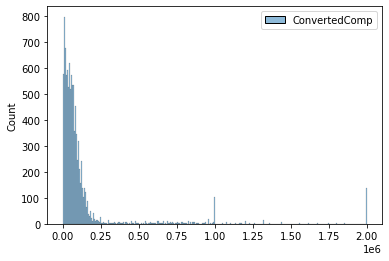

In [15]:
import seaborn as sns
# your code goes here
Query= '''
select ConvertedComp 
from master'''

data = pd.read_sql_query(Query,conn)
sns.histplot(data)

### Box Plots


Plot a box plot of `Age.`


<AxesSubplot:xlabel='Age'>

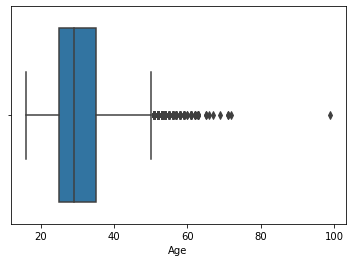

In [28]:
# your code goes here
Query='''
select Age
from master
'''

boxplot_data= pd.read_sql_query(Query,conn)
sns.boxplot(x='Age', data=boxplot_data)



## Visualizing relationships in data


### Scatter Plots


Create a scatter plot of `Age` and `WorkWeekHrs.`


<AxesSubplot:xlabel='Age', ylabel='WorkWeekHrs'>

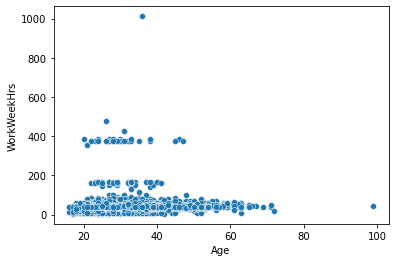

In [29]:
# your code goes here
Query = '''
select Age,WorkWeekHrs
from master
'''

data= pd.read_sql_query(Query,conn)
sns.scatterplot(x='Age', y='WorkWeekHrs', data=data)


### Bubble Plots


Create a bubble plot of `WorkWeekHrs` and `CodeRevHrs`, use `Age` column as bubble size.


<AxesSubplot:xlabel='WorkWeekHrs', ylabel='CodeRevHrs'>

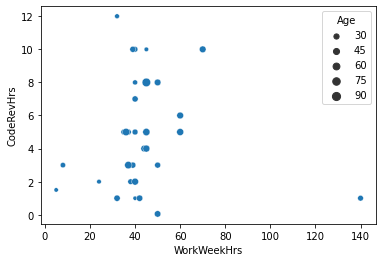

In [43]:
# your code goes here
Query = '''
Select WorkWeekHrs, CodeRevHrs, Age
from master
group by age
'''

BubblePlot_data = pd.read_sql_query(Query,conn)
sns.scatterplot(x = 'WorkWeekHrs', y = 'CodeRevHrs', size= 'Age' , data=BubblePlot_data)



## Visualizing composition of data


### Pie Charts


Create a pie chart of the top 5 databases that respondents wish to learn next year. Label the pie chart with database names. Display percentages of each database on the pie chart.


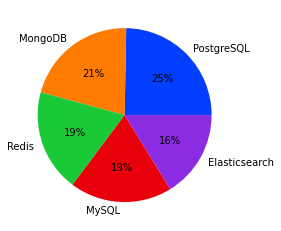

In [65]:
# your code goes here
import matplotlib
import matplotlib.pyplot as plt

Query = '''
select DatabaseDesireNextYear ,SUM(Respondent) as sumres
FROM DatabaseDesireNextYear
group by DatabaseDesireNextYear
order by sumres desc
'''
df= pd.read_sql_query(Query, conn)
data= df.head(5)

colors = sns.color_palette('bright')
plt.pie(data['sumres'], labels=data['DatabaseDesireNextYear'], autopct = '%0.0f%%', colors= colors)
plt.show()


### Stacked Charts


Create a stacked chart of median `WorkWeekHrs` and `CodeRevHrs` for the age group 30 to 35.


Text(0.5, 1.0, 'Stacked bar of median WorkWeekHrs and CodeRevHrs')

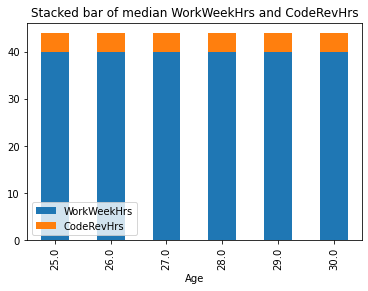

In [112]:
# your code goes here
Query = '''
select WorkWeekHrs,CodeRevHrs,Age
from master
where age>=25 and age<=30
'''
stacked= pd.read_sql_query(Query,conn)
stacked.groupby('Age').median().plot.bar(stacked = True)
plt.title('Stacked bar of median WorkWeekHrs and CodeRevHrs')

## Visualizing comparison of data


### Line Chart


Plot the median `ConvertedComp` for all ages from 45 to 60.


Text(0.5, 1.0, 'median of converted comp in 45-60 age group')

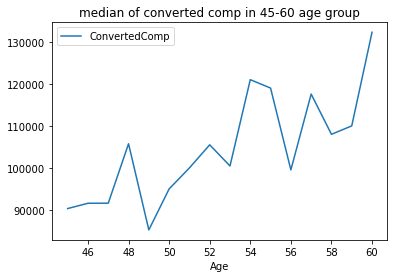

In [74]:
# your code goes here
Query = '''
select ConvertedComp, Age
from master
where Age<=60 and Age>=45
'''

linec= pd.read_sql_query(Query,conn)
linec.groupby('Age').median().plot.line(stacked = True)
plt.title('median of converted comp in 45-60 age group')


### Bar Chart


Create a horizontal bar chart using column `MainBranch.`


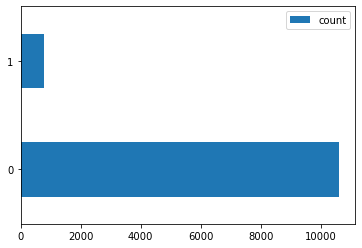

In [79]:
# your code goes here
Query = '''
select MainBranch, count(*) as count
from master
group by MainBranch
'''
barc=pd.read_sql_query(Query,conn)
barc.plot.barh(stacked= False)
plt.show()

Close the database connection.


In [80]:
conn.close()

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |


Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork21426264-2022-01-01&cm_mmc=Email_Newsletter-\_-Developer_Ed%2BTech-\_-WW_WW-\_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).
